/home/codespace/.local/lib/python3.10/site-packages/matplotlib/contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/codespace/.local/lib/python3.10/site-packages/matplotlib/contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/codespace/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


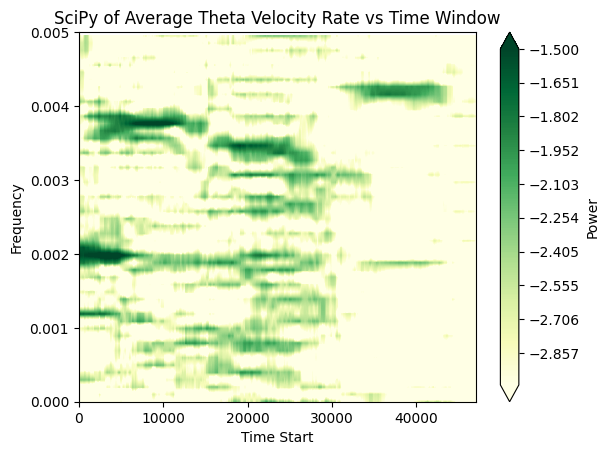

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.fft import fft, fftfreq, rfftfreq, rfft
import pandas as pd

df = pd.read_csv('/workspaces/Variability-in-Black-Holes/data/AvgVtheta', sep = '\t', header=None, names = ['time', 'radius', 'mdot'])

df = df.loc[df['radius'] == 2.00393e+00]
times = df.time.unique()
timemin = times[0:471]
timemax = times[100:571]

fft_data = []
fftls_data = []

freq = rfftfreq(101, 100)

def main(min, max, df):
  df = df.loc[(df['time'] >= min) & (df['time'] <= max)]
  variable_array = np.array(df['mdot'])
  power = rfft(variable_array)
  fft_data.append(power)
  frequency, power2 = LombScargle(df['time'], variable_array).autopower()
  fftls_data.append(power2)
  return frequency


for time1, time2 in zip(timemin, timemax):
  freq2 = main(time1, time2, df)

fft_df = pd.DataFrame(fft_data)
fft_df = fft_df.transpose()
fftls_df = pd.DataFrame(fftls_data)
fftls_df = fftls_df.transpose()


plt.figure()
plt.title('SciPy of Average Theta Velocity Rate vs Time Window')
plt.xlabel('Time Start')
plt.ylabel('Frequency')
plt.ylim(0, 0.005)
plt.contourf(timemin, freq, np.log(fft_df), cmap='YlGn', extend = 'both', levels = np.linspace(-3, -1.5, 200))
plt.colorbar(label = 'Power')
plt.show()